In [4]:
import numpy as np
np.set_printoptions(2)

In [2]:
def kernel(X1, X2):
    return np.dot(X1, X2.T)

In [14]:
def kronecker(Y1, Y2):
    return (Y1 == Y2.ravel()).astype(float)

In [5]:
n = 5
d = 2
m = 3

In [6]:
X = np.random.rand(n, d)
Y = np.random.randint(0, m, n)[:, np.newaxis]

In [7]:
X

array([[ 0.62,  0.5 ],
       [ 0.31,  0.78],
       [ 0.36,  0.11],
       [ 0.22,  0.78],
       [ 0.91,  0.75]])

In [8]:
Y

array([[0],
       [2],
       [2],
       [0],
       [0]])

In [9]:
classes = np.unique(Y)

In [10]:
classes

array([0, 2])

In [11]:
K = kernel(X, X)
K

array([[ 0.63,  0.59,  0.27,  0.52,  0.94],
       [ 0.59,  0.71,  0.2 ,  0.68,  0.88],
       [ 0.27,  0.2 ,  0.14,  0.16,  0.41],
       [ 0.52,  0.68,  0.16,  0.65,  0.78],
       [ 0.94,  0.88,  0.41,  0.78,  1.39]])

In [15]:
B = kronecker(Y, classes[:, np.newaxis])
B

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [17]:
zeta = 1e-4

In [18]:
from scipy.linalg import cholesky
from scipy.linalg import cho_solve

In [21]:
lower = True
L = cholesky(K + n * zeta * np.eye(n), lower=lower, check_finite=True)
V = cho_solve((L, lower), B, check_finite=True)
V

array([[  651.42,  -482.66],
       [-1229.77,  1358.04],
       [ -593.07,  1857.48],
       [  907.47,  -618.94],
       [   -2.21,  -721.25]])

In [22]:
A = np.dot(V.T, np.dot(K, V))

In [23]:
A

array([[ 0.72,  0.25],
       [ 0.25,  0.15]])

In [45]:
def create_my_matrix(X, Y, zeta=1e-4):
    K = kernel(X, X)
    classes = np.unique(Y)
    B = kronecker(Y, classes[:, np.newaxis])
    lower = True
    L = cholesky(K + X.shape[0] * zeta * np.eye(X.shape[0]), lower=lower, check_finite=True)
    V = cho_solve((L, lower), B, check_finite=True)
    return np.dot(V.T, np.dot(K, V))

In [29]:
A = create_my_matrix(X, Y)
print(A, np.trace(A))

[[ 0.72  0.25]
 [ 0.25  0.15]] 0.868211186675


In [42]:
indices = np.random.choice(n, 3, replace=False)
A = create_my_matrix(X[indices], Y[indices])
print(A, np.trace(A))

[[ 0.62  0.01]
 [ 0.01  0.97]] 1.58148128079


In [71]:
n = 200
X = np.random.rand(n, d)
Y = np.random.randint(0, m, n)[:, np.newaxis]

In [60]:
indices = np.arange(0, 50)
A1 = create_my_matrix(X[indices], Y[indices])
print(A1, np.trace(A1))

[[ 0.14  0.17  0.12]
 [ 0.17  0.21  0.15]
 [ 0.12  0.15  0.2 ]] 0.541233828069


In [61]:
indices = np.arange(51, 100)
A2 = create_my_matrix(X[indices], Y[indices])
print(A2, np.trace(A2))

[[ 0.16  0.11  0.1 ]
 [ 0.11  0.24  0.17]
 [ 0.1   0.17  0.13]] 0.524686050093


In [62]:
indices = np.arange(100, 150)
A3 = create_my_matrix(X[indices], Y[indices])
print(A3, np.trace(A3))

[[ 0.2   0.14  0.16]
 [ 0.14  0.29  0.07]
 [ 0.16  0.07  0.15]] 0.6335805909


In [63]:
indices = np.arange(150, 200)
A4 = create_my_matrix(X[indices], Y[indices])
print(A4, np.trace(A4))

[[ 0.09  0.13  0.12]
 [ 0.13  0.59  0.07]
 [ 0.12  0.07  0.18]] 0.860048114234


In [64]:
A = create_my_matrix(X, Y)
print(A, np.trace(A))

[[ 0.13  0.17  0.12]
 [ 0.17  0.22  0.17]
 [ 0.12  0.17  0.13]] 0.483389675312


In [65]:
np.trace(A1 + A2 + A3 + A4) / 4

0.63988714582411943

In [80]:
tr_true = np.trace(create_my_matrix(X, Y))
tr_list = np.zeros(1000)
for t in range(1000):
    indices = np.random.choice(n, 50, replace=False)
    tr = np.trace(create_my_matrix(X[indices], Y[indices]))
    tr_list[t] = tr
tr_means = np.cumsum(tr_list) / np.arange(1, 1001)
plt.plot(np.arange(1000), np.sqrt(tr_list))
plt.plot(np.arange(1000), np.sqrt(tr_means))
plt.plot(np.arange(1000), np.ones(1000) * np.sqrt(tr_true))

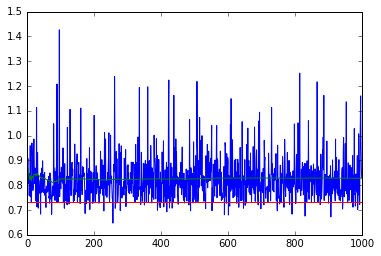

In [81]:
plt.show()

In [82]:
np.dot(B, B.T)

array([[ 1.,  0.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  1.]])

In [83]:
Y

array([[1],
       [2],
       [2],
       [1],
       [2],
       [0],
       [1],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [1],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [0],
       [0],
       [0],
       [1],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
       [0],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [2],
       [1],
       [2],
    